#### CNNN without Transfer Learning

In [1]:
import os
import cv2
from PIL import Image

In [2]:

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    img = Image.open(f_path)
                    
                    img.save(f_path.replace('jpg' , 'jpeg')) 
                    os.remove(f_path)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext



In [3]:
source_dir ='C:\\Users\\maitreyee\\Documents\\course_material\\capstone\\disney_character\\disney_character\\princess_new'

good_exts=[ 'png', 'jpeg' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  .DS_Store
*** WARNING*** you have files in  C:\Users\maitreyee\Documents\course_material\capstone\disney_character\disney_character\princess_new  it should only contain sub directories
processing class directory  Alice
file  C:\Users\maitreyee\Documents\course_material\capstone\disney_character\disney_character\princess_new\Alice\Alice25.jpg  has an invalid extension  jpg
*** fatal error, you a sub directory  Alice25.jpg  in class directory  Alice
file  C:\Users\maitreyee\Documents\course_material\capstone\disney_character\disney_character\princess_new\Alice\Alice26.jpg  has an invalid extension  jpg
*** fatal error, you a sub directory  Alice26.jpg  in class directory  Alice
file  C:\Users\maitreyee\Documents\course_material\capstone\disney_character\disney_character\princess_new\Alice\Alice28.jpg  has an invalid extension  jpg
*** fatal error, you a sub directory  Alice28.jpg  in class directory  Alice
file  C:\Users\maitreyee\Documents\course_material\cap

*** fatal error, you a sub directory  96xUAC7.jpg  in class directory  Belle
file  C:\Users\maitreyee\Documents\course_material\capstone\disney_character\disney_character\princess_new\Belle\9cec8bdf957efe3f8abb27209bc43e07.jpg  has an invalid extension  jpg
*** fatal error, you a sub directory  9cec8bdf957efe3f8abb27209bc43e07.jpg  in class directory  Belle
file  C:\Users\maitreyee\Documents\course_material\capstone\disney_character\disney_character\princess_new\Belle\Belle-disney-2348912-278-400.webp  has an invalid extension  webp


OSError: cannot identify image file 'C:\\Users\\maitreyee\\Documents\\course_material\\capstone\\disney_character\\disney_character\\princess_new\\Belle\\Belle-disney-2348912-278-400.webp'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#from tensorflow.keras.models import keras
from tensorflow.keras.regularizers import l2

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [5]:
# from keras_preprocessing.image import ImageDataGenerator
# #from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
# from keras.layers import Conv2D, MaxPooling2D
# from keras import regularizers, optimizers
# from keras.preprocessing.image import img_to_array
# from sklearn.utils import shuffle
# #tf.losses.softmax_cross_entropy
# import pandas as pd
# import numpy as np
# import pandas as pd
# #import zipfile
# from keras.preprocessing.image import load_img
# import warnings
# import numpy as np
# from keras.preprocessing.image import img_to_array
# from numpy import load
# import tensorflow as tf
# #from google.colab import drive

In [6]:
import pathlib



In [9]:
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path("C:\\Users\\maitreyee\\Documents\\course_material\\capstone\\disney_character\\disney_character\\princess_new")

In [10]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

379


In [11]:
Alice = list(data_dir.glob('Alice/*'))

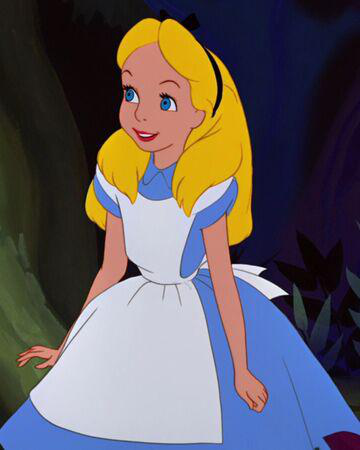

In [12]:
PIL.Image.open(str(Alice[0]))

In [13]:
batch_size = 20
img_height = 180
img_width = 180

In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 375 files belonging to 21 classes.
Using 300 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 375 files belonging to 21 classes.
Using 75 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['Alice', 'Amber', 'Anastasia', 'Anna', 'Ariel', 'Belle', 'Cindrella', 'Elena', 'Elsa', 'Esmeralda', 'JanePorter', 'Jasmine', 'Merida', 'Moana', 'Mulan', 'Pocahontas', 'Rapunzel', 'Tiana', 'TinkerBell', 'aurora', 'snowWhite']


<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


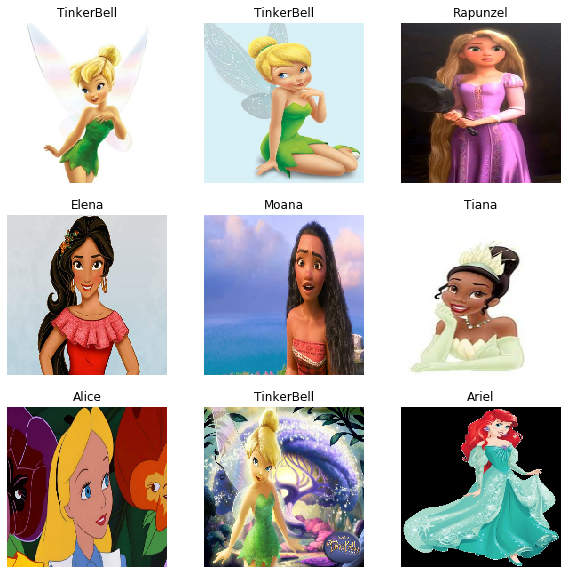

In [17]:
import matplotlib.pyplot as plt


print(train_ds)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    
    
    
    for i in range(9):
        
        #print(class_names[labels[i]])
        
          
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

### Create Model

In [19]:
num_classes = 22

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [22]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
15/15 [==============================] - 8s 453ms/step - loss: 3.0668 - accuracy: 0.0824 - val_loss: 3.0564 - val_accuracy: 0.0533
Epoch 2/50
15/15 [==============================] - 7s 401ms/step - loss: 3.0380 - accuracy: 0.1110 - val_loss: 3.0473 - val_accuracy: 0.0933
Epoch 3/50
15/15 [==============================] - 7s 417ms/step - loss: 3.0175 - accuracy: 0.1402 - val_loss: 3.0386 - val_accuracy: 0.0933
Epoch 4/50
15/15 [==============================] - 7s 427ms/step - loss: 3.0190 - accuracy: 0.1555 - val_loss: 3.0307 - val_accuracy: 0.0933
Epoch 5/50
15/15 [==============================] - 7s 430ms/step - loss: 2.9974 - accuracy: 0.1488 - val_loss: 3.0227 - val_accuracy: 0.0933
Epoch 6/50
15/15 [==============================] - 7s 427ms/step - loss: 2.9625 - accuracy: 0.1848 - val_loss: 3.0152 - val_accuracy: 0.0933
Epoch 7/50
15/15 [==============================] - 7s 418ms/step - loss: 2.9916 - accuracy: 0.1266 - val_loss: 3.0089 - val_accuracy: 0.0933
Epoch 

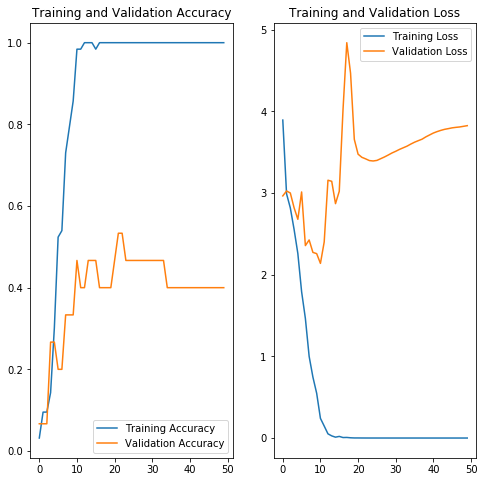

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

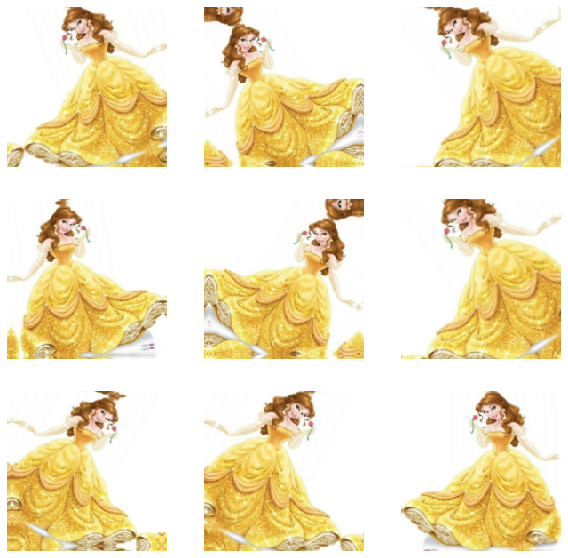

In [24]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [25]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=l2(0.2)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [28]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
15/15 [==============================] - 9s 490ms/step - loss: 10.6348 - accuracy: 0.1319 - val_loss: 8.0547 - val_accuracy: 0.1333
Epoch 2/100
15/15 [==============================] - 8s 477ms/step - loss: 7.1779 - accuracy: 0.2740 - val_loss: 5.6959 - val_accuracy: 0.2400
Epoch 3/100
15/15 [==============================] - 8s 491ms/step - loss: 5.1162 - accuracy: 0.2973 - val_loss: 4.1354 - val_accuracy: 0.2933
Epoch 4/100
15/15 [==============================] - 9s 517ms/step - loss: 3.7214 - accuracy: 0.3456 - val_loss: 3.2394 - val_accuracy: 0.4000
Epoch 5/100
15/15 [==============================] - 8s 510ms/step - loss: 2.5560 - accuracy: 0.5358 - val_loss: 2.6191 - val_accuracy: 0.4800
Epoch 6/100
15/15 [==============================] - 8s 516ms/step - loss: 1.9823 - accuracy: 0.6015 - val_loss: 2.4914 - val_accuracy: 0.4800
Epoch 7/100
15/15 [==============================] - 9s 528ms/step - loss: 1.7342 - accuracy: 0.6196 - val_loss: 2.1343 - val_accuracy: 0.586

Epoch 58/100
15/15 [==============================] - 9s 530ms/step - loss: 0.1197 - accuracy: 0.9889 - val_loss: 1.8371 - val_accuracy: 0.6800
Epoch 59/100
15/15 [==============================] - 9s 549ms/step - loss: 0.1488 - accuracy: 0.9785 - val_loss: 1.8436 - val_accuracy: 0.7200
Epoch 60/100
15/15 [==============================] - 9s 525ms/step - loss: 0.3283 - accuracy: 0.9331 - val_loss: 1.7110 - val_accuracy: 0.7200
Epoch 61/100
15/15 [==============================] - 9s 526ms/step - loss: 0.2173 - accuracy: 0.9660 - val_loss: 2.0414 - val_accuracy: 0.7200
Epoch 62/100
15/15 [==============================] - 9s 526ms/step - loss: 0.1975 - accuracy: 0.9859 - val_loss: 2.3348 - val_accuracy: 0.7200
Epoch 63/100
15/15 [==============================] - 9s 522ms/step - loss: 0.1406 - accuracy: 0.9917 - val_loss: 1.9685 - val_accuracy: 0.6933
Epoch 64/100
15/15 [==============================] - 9s 524ms/step - loss: 0.1132 - accuracy: 0.9925 - val_loss: 2.0670 - val_accuracy:

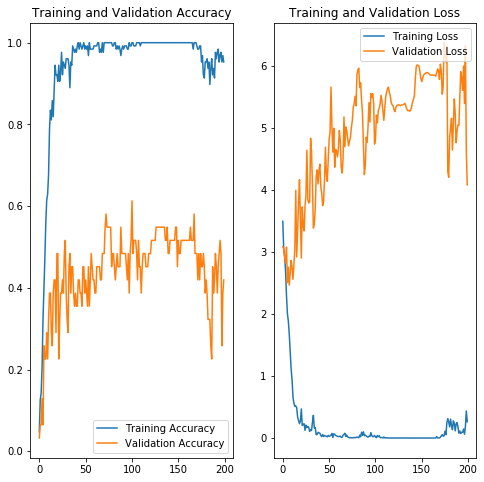

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()